<a href="https://colab.research.google.com/github/ciaograsso06/diabetes-pimas-data-science/blob/main/CaioGrasso_lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 3

# Exercício 1

1 a)

In [ ]:
#Carregando e preparando os dados

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Redes Neurais 2024.2/Lista3/diabetes.csv'

column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(file_path, delimiter=',', header=0)
dia = data.copy()
print(data.head())


Mounted at /content/drive
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Fazendo importações de LIBS e verificando os dados do Dataset

In [ ]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set(rc={'figure.figsize' : (10, 5)})
sns.set_style("darkgrid", {'axes.grid' : True})


In [ ]:
print(data.dtypes)
data = data.dropna()

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Descrição dos Dados

In [ ]:
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Verificando correlação entre os dados

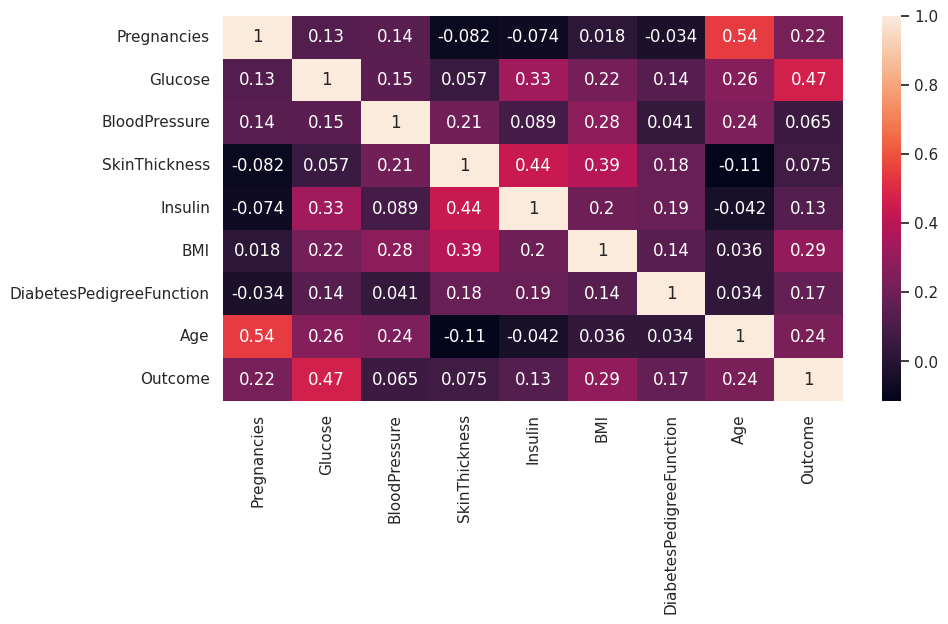

In [ ]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Distribuição dos Dados

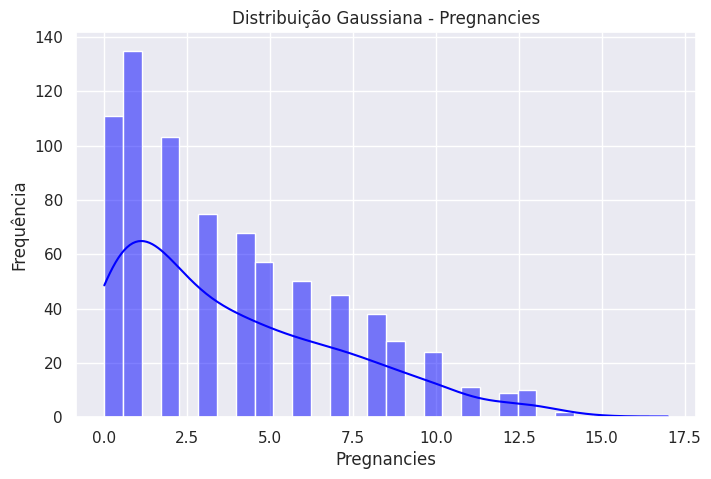

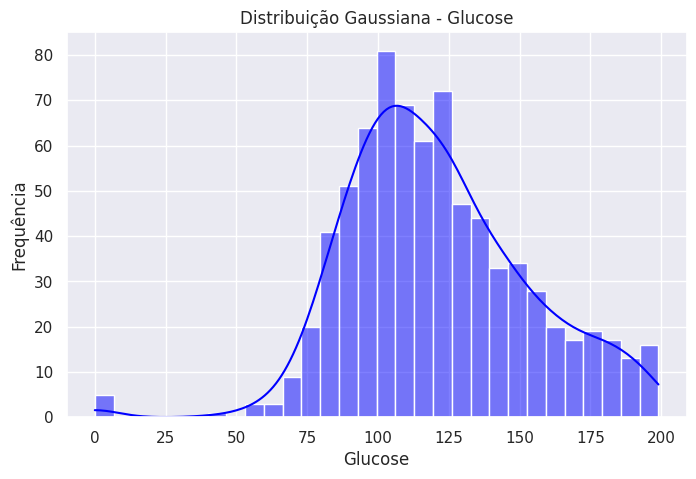

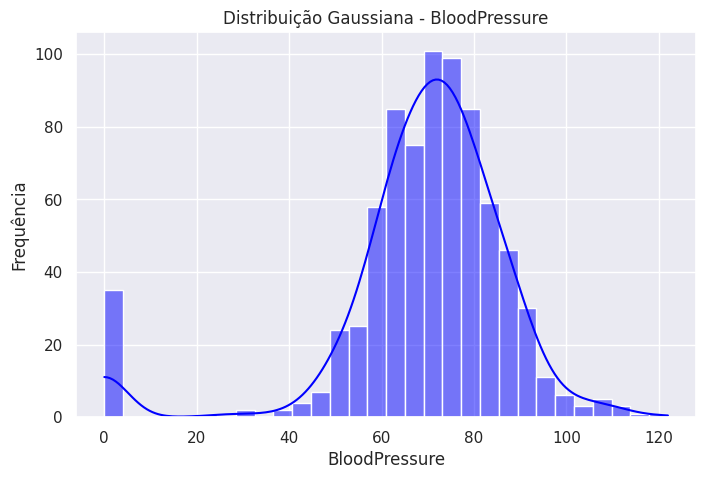

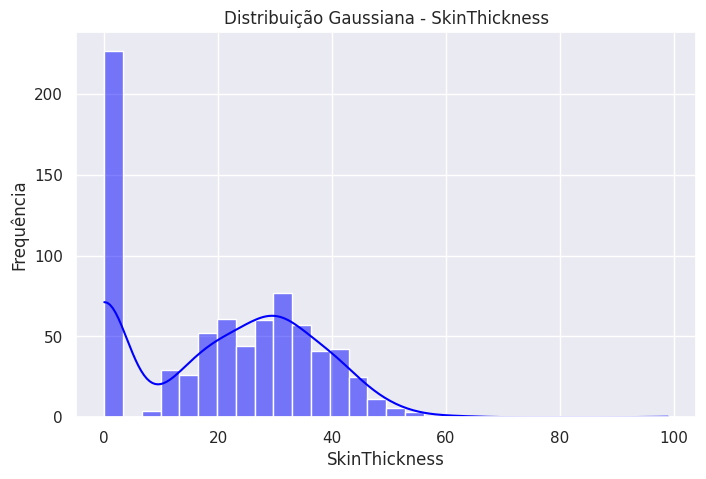

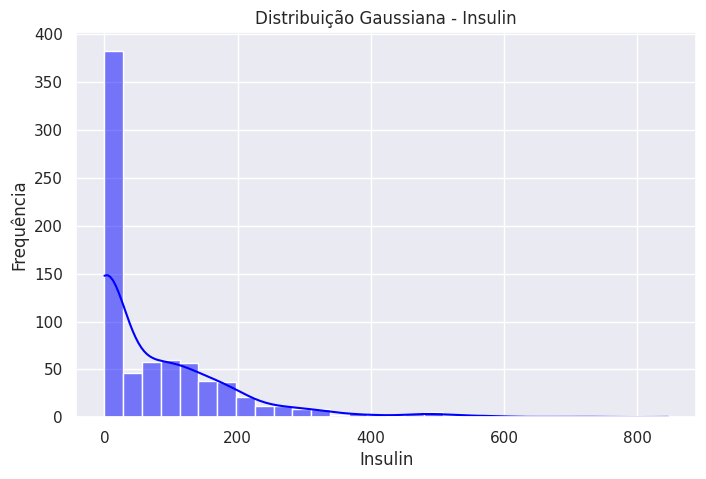

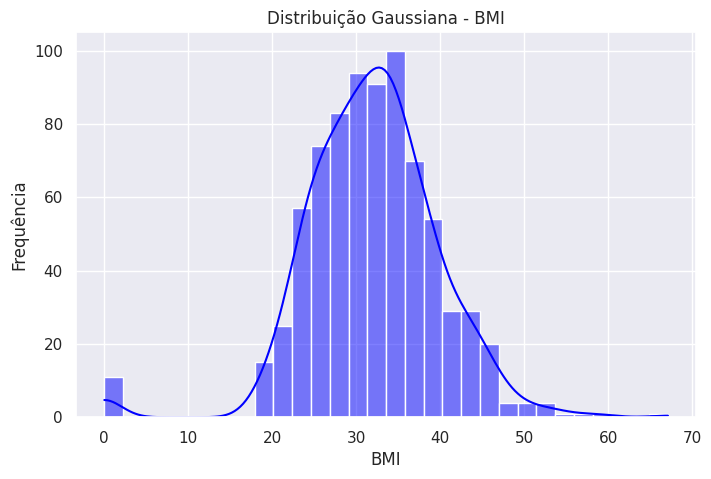

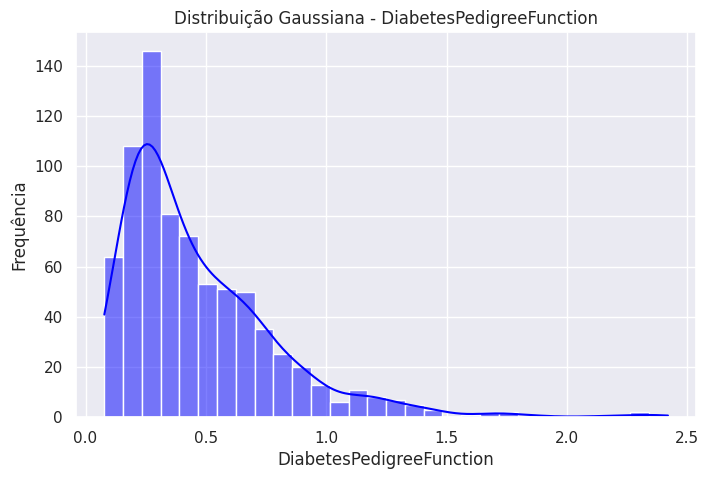

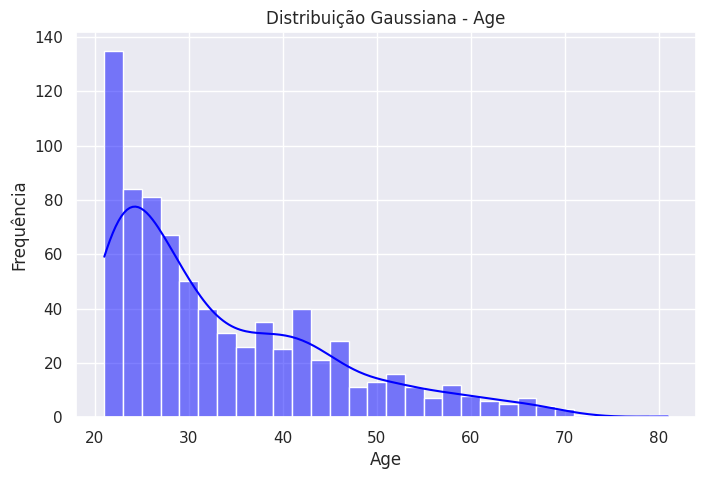

In [ ]:
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição Gaussiana - {column}')  # Nome da coluna aparece no título
    plt.xlabel(column)  # Nome da coluna no eixo X
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

In [ ]:
print(data[['BloodPressure', 'SkinThickness']].head())

   BloodPressure  SkinThickness
0             72             35
1             66             29
2             64              0
3             66             23
4             40             35


Separando meu dataset para Treino teste e Validação

1 a)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verifique os tamanhos novamente
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (537, 8)
y_train shape: (537,)
X_test shape: (231, 8)
y_test shape: (231,)


In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(data.info())
print(data.head())

X shape: (768, 8)
y shape: (768,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29    

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir o conjunto de treino em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Estatísticas básicas
classes, counts = np.unique(y, return_counts=True)
class_distribution = counts / len(y) * 100
print(f"Distribuição das classes no dataset: {dict(zip(classes, class_distribution))}")

Distribuição das classes no dataset: {0: 65.10416666666666, 1: 34.89583333333333}


1 b)

In [ ]:
majority_class = classes[np.argmax(counts)]
naive_accuracy = accuracy_score(y_test, np.full_like(y_test, majority_class))
print(f"Acurácia do modelo ingênuo: {naive_accuracy:.2f}")

Acurácia do modelo ingênuo: 0.65


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
results = dummy.fit(X,y)
accuracy = results.score(X,y)
print(f"Acurácia do DummyClassifier: {accuracy}")

Acurácia do DummyClassifier: 0.6510416666666666


1 c) e d)

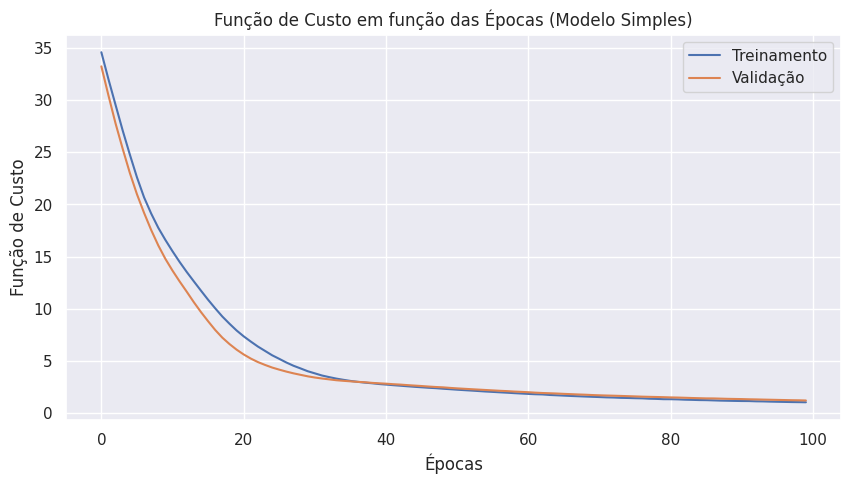

Acurácia no conjunto de teste: 0.61
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
model_logistic = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compilar o modelo
model_logistic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_logistic = model_logistic.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# Gráfico da função de custo
plt.plot(history_logistic.history['loss'], label='Treinamento')
plt.plot(history_logistic.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Função de Custo em função das Épocas (Modelo Simples)')
plt.legend()
plt.show()

# Avaliar no conjunto de teste
test_loss, test_accuracy = model_logistic.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy:.2f}")

# Matriz de confusão
y_pred = (model_logistic.predict(X_test) > 0.5).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Análise
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")
false_negatives = cm[1, 0]
false_positives = cm[0, 1]
print(f"Falsos negativos: {false_negatives}, Falsos positivos: {false_positives}")

Matriz de Confusão:
[[116  34]
 [ 56  25]]
Acurácia: 0.6103896103896104
Falsos negativos: 56, Falsos positivos: 34


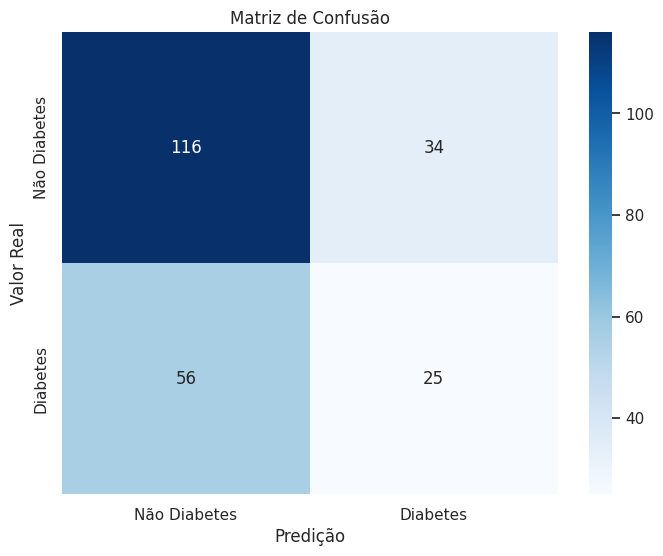

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabetes', 'Diabetes'], yticklabels=['Não Diabetes', 'Diabetes'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()


Analisando nossa Matriz de Confusão vemos que o reflexo da baixa acurácia, 67%, está infelizmente mostrando que o modelo está confundindo uma pessoa que tem diabetes prevendo que não tem, o que no cenário da medicina é bem crítico por se tratar de uma condição onde a pessoa precia de um tratamento e acompanhamento adequado.

Falando dos falsos positivos, trata-se de uma pessoa que foi diagnosticada com diabetes quando na verdade não tem, isso pode gerar basicamente esforço "desnecessário" o tratamento é restrito e isso desgasta, porém a pessoa permaneceria saudável, não sendo tão crítico quanto o Falso Negativo.

1 h)

In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16, input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))#activation = 'relu' ))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.001)))# activation='relu'))
model2.add(tf.keras.layers.ELU(alpha=1))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer='rmsprop', loss='MSE', metrics=['accuracy',])

In [ ]:
history2 = model2.fit(X_train, y_train, validation_split=0.20, batch_size=64,  epochs=100, verbose=2, class_weight={0:0.35, 1:0.65})

Epoch 1/100
6/6 - 1s - 248ms/step - accuracy: 0.4577 - loss: 0.2617 - val_accuracy: 0.3372 - val_loss: 0.5052
Epoch 2/100
6/6 - 0s - 16ms/step - accuracy: 0.4227 - loss: 0.2698 - val_accuracy: 0.3605 - val_loss: 0.4980
Epoch 3/100
6/6 - 0s - 9ms/step - accuracy: 0.4461 - loss: 0.2607 - val_accuracy: 0.3488 - val_loss: 0.4030
Epoch 4/100
6/6 - 0s - 22ms/step - accuracy: 0.5131 - loss: 0.2403 - val_accuracy: 0.4302 - val_loss: 0.3897
Epoch 5/100
6/6 - 0s - 7ms/step - accuracy: 0.5364 - loss: 0.2295 - val_accuracy: 0.3721 - val_loss: 0.4695
Epoch 6/100
6/6 - 0s - 7ms/step - accuracy: 0.4869 - loss: 0.2297 - val_accuracy: 0.4419 - val_loss: 0.4968
Epoch 7/100
6/6 - 0s - 10ms/step - accuracy: 0.4577 - loss: 0.2421 - val_accuracy: 0.4535 - val_loss: 0.4603
Epoch 8/100
6/6 - 0s - 7ms/step - accuracy: 0.5569 - loss: 0.2016 - val_accuracy: 0.4535 - val_loss: 0.4782
Epoch 9/100
6/6 - 0s - 7ms/step - accuracy: 0.5131 - loss: 0.2178 - val_accuracy: 0.4651 - val_loss: 0.4331
Epoch 10/100
6/6 - 0s -

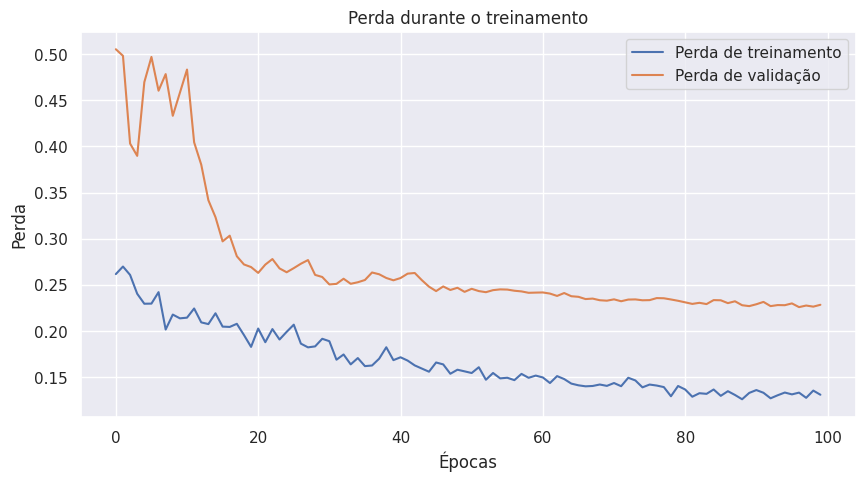

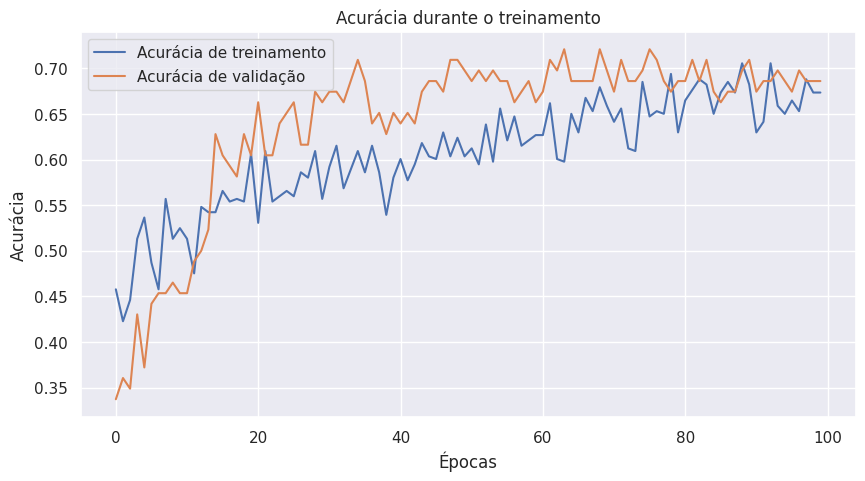

In [ ]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Perda de treinamento')
    plt.plot(history.history['val_loss'], label='Perda de validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.title('Perda durante o treinamento')
    plt.show()

    plt.plot(history.history['accuracy'], label='Acurácia de treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.title('Acurácia durante o treinamento')
    plt.show()

plot_history(history2)

In [ ]:
model2.save("model2.h5")

In [ ]:

model2.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6331 - loss: 0.2532 


[0.24587859213352203, 0.6580086350440979]

Avaliação da arquitetura explorada

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
architectures = [
    (10, 10),
    (20, 20),
    (50, 30),
    (100, 50, 25),
]

for architecture in architectures:
    print(f"\nArquitetura: {architecture}")
    mlp = MLPClassifier(hidden_layer_sizes=architecture, max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)

    accuracy = mlp.score(X_test, y_test)
    print(f"Acurácia: {accuracy}")

    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(cm)

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))



Arquitetura: (10, 10)
Acurácia: 0.6796536796536796
Matriz de Confusão:
[[118  32]
 [ 42  39]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       150
           1       0.55      0.48      0.51        81

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.67       231


Arquitetura: (20, 20)
Acurácia: 0.6666666666666666
Matriz de Confusão:
[[102  48]
 [ 29  52]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       150
           1       0.52      0.64      0.57        81

    accuracy                           0.67       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.67      0.67       231


Arquitetura: (50, 30)
Acurácia: 0.7012987012987013
Matriz de Confusão:
[[117  33]
 [ 36  45]]

Re

1 i)

Ajustando hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para busca
param_grid = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (50, 30), (100, 50, 25)],
    'max_iter': [300, 500, 1000],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

# GridSearchCV
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print(f"Melhor combinação de parâmetros: {grid_search.best_params_}")

# Avaliar a acurácia com o melhor modelo
best_mlp = grid_search.best_estimator_
best_accuracy = best_mlp.score(X_test, y_test)
print(f"Acurácia com o melhor modelo: {best_accuracy}")


Melhor combinação de parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 1000, 'solver': 'adam'}
Acurácia com o melhor modelo: 0.7056277056277056


# Exercício 2

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[columns_to_impute] = data[columns_to_impute].replace(0, np.nan)

imputer = SimpleImputer(strategy='mean')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Item 2 a)

In [ ]:
import numpy as np
import pandas as pd
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Calcular a porcentagem de ocorrência das classes
class_distribution = pd.Series(y).value_counts(normalize=True) * 100
print("Distribuição das Classes (%):\n", class_distribution)

Distribuição das Classes (%):
 0    65.104167
1    34.895833
Name: proportion, dtype: float64


Item 2 b)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

naive_accuracy = accuracy_score(y_test, y_dummy_pred)
print("Acurácia do Modelo Ingênuo:", naive_accuracy)

Acurácia do Modelo Ingênuo: 0.6493506493506493


2 c)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo perceptron
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Entrada e saída
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6448 - loss: 8.1767 - val_accuracy: 0.6407 - val_loss: 7.0171
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 5.9562 - val_accuracy: 0.6190 - val_loss: 5.6742
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6847 - loss: 4.3361 - val_accuracy: 0.6364 - val_loss: 4.7679
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 3.1892 - val_accuracy: 0.6147 - val_loss: 4.2466
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6866 - loss: 2.5444 - val_accuracy: 0.6147 - val_loss: 3.9276
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 2.2924 - val_accuracy: 0.6061 - val_loss: 3.6477
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6849 - loss: 2.1602 - val_accuracy: 0.6061 - val_loss: 3.3903
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6624 - loss: 2.0591 - val_accuracy: 0.5974 - 

2 d)

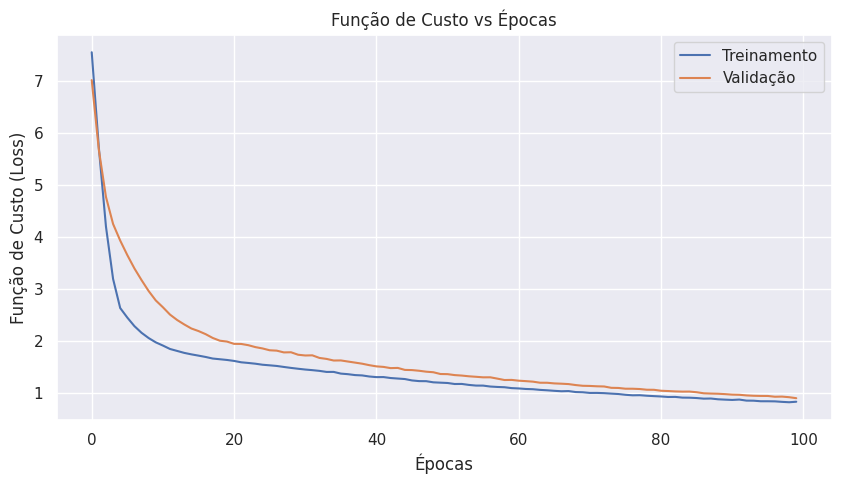

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo (Loss)')
plt.legend()
plt.title('Função de Custo vs Épocas')
plt.show()


2 e)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6803 - loss: 0.8343 
Acurácia no conjunto de teste: 0.6753246784210205


2 f)

Na matriz de confusão apresentada podemos ver que O modelo tem um desempenho razoável na classificação da Classe 0 (ausência de diabetes), com 105 acertos (TN).
No entanto, o modelo apresenta dificuldades significativas em identificar corretamente a Classe 1 (presença de diabetes), com apenas 32 acertos (TP). Também há mais falsos negativos (48) do que falsos positivos (46). Isso indica que o modelo tem mais dificuldade em detectar corretamente casos de diabetes, classificando muitos deles como não diabéticos.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusão:
 [[116  34]
 [ 41  40]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       150
           1       0.54      0.49      0.52        81

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.67       231



In [ ]:
# Erros
errors = X_test[y_test != y_pred.flatten()]
print("Exemplos de erros (amostras):\n", errors)

Exemplos de erros (amostras):
 [[3.000e+00 1.300e+02 7.800e+01 2.300e+01 7.900e+01 2.840e+01 3.230e-01
  3.400e+01]
 [4.000e+00 1.090e+02 6.400e+01 4.400e+01 9.900e+01 3.480e+01 9.050e-01
  2.600e+01]
 [1.100e+01 1.430e+02 9.400e+01 3.300e+01 1.460e+02 3.660e+01 2.540e-01
  5.100e+01]
 [4.000e+00 1.440e+02 8.200e+01 3.200e+01 0.000e+00 3.850e+01 5.540e-01
  3.700e+01]
 [8.000e+00 1.050e+02 1.000e+02 3.600e+01 0.000e+00 4.330e+01 2.390e-01
  4.500e+01]
 [0.000e+00 1.070e+02 7.600e+01 0.000e+00 0.000e+00 4.530e+01 6.860e-01
  2.400e+01]
 [3.000e+00 1.160e+02 0.000e+00 0.000e+00 0.000e+00 2.350e+01 1.870e-01
  2.300e+01]
 [0.000e+00 1.650e+02 9.000e+01 3.300e+01 6.800e+02 5.230e+01 4.270e-01
  2.300e+01]
 [0.000e+00 1.650e+02 7.600e+01 4.300e+01 2.550e+02 4.790e+01 2.590e-01
  2.600e+01]
 [0.000e+00 1.310e+02 8.800e+01 0.000e+00 0.000e+00 3.160e+01 7.430e-01
  3.200e+01]
 [3.000e+00 1.280e+02 7.200e+01 2.500e+01 1.900e+02 3.240e+01 5.490e-01
  2.700e+01]
 [1.000e+00 1.490e+02 6.800e+01 2.

2 h)

In [ ]:
mlp_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16,activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

loss, accuracy = mlp_model.evaluate(X_test, y_test)
print("Acurácia do modelo MLP no conjunto de teste:", accuracy)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5993 - loss: 2.9942 - val_accuracy: 0.5541 - val_loss: 1.1198
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6150 - loss: 1.0379 - val_accuracy: 0.6147 - val_loss: 1.0526
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6639 - loss: 0.8442 - val_accuracy: 0.6537 - val_loss: 1.0992
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5736 - loss: 0.8670 - val_accuracy: 0.6320 - val_loss: 0.8763
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.6744 - val_accuracy: 0.6234 - val_loss: 0.7991
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6745 - loss: 0.6224 - val_accuracy: 0.6104 - val_loss: 0.8268
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.6438 - val_accuracy: 0.5671 - val_loss: 0.8911
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6960 - loss: 0.6414 - val_accuracy: 0.5974 - 

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


2 i)

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=256, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    directory='my_dir',
    project_name='mlp_tuning'
)

tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
best_hps = tuner.get_best_hyperparameters()[0]
print("Melhores hiperparâmetros:", best_hps.values)

Trial 8 Complete [00h 00m 02s]
val_accuracy: 0.5757575631141663

Best val_accuracy So Far: 0.6277056336402893
Total elapsed time: 00h 00m 26s
Melhores hiperparâmetros: {'units': 192, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4712 - loss: 1.8828 - val_accuracy: 0.6234 - val_loss: 0.9096
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5786 - loss: 1.1210 - val_accuracy: 0.6061 - val_loss: 1.1876
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6401 - loss: 0.8635 - val_accuracy: 0.6147 - val_loss: 0.7933
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6664 - loss: 0.7535 - val_accuracy: 0.6277 - val_loss: 0.6990
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 0.6887 - val_accuracy: 0.6320 - val_loss: 0.9608
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.7618 - val_accuracy: 0.6667 - val_loss: 0.7176
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.6257 - val_accuracy: 0.6753 - val_loss: 0.6042
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.6020 - val_accuracy: 0.6840 - val_loss

2 k)

In [ ]:
# Melhor modelo MLP com hiperparâmetros ajustados
best_model = tuner.hypermodel.build(best_hps)

# Compilando o modelo otimizado
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
mlp_optimized_history = best_model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5114 - loss: 5.9157 - val_accuracy: 0.6147 - val_loss: 1.6856
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6603 - loss: 1.3117 - val_accuracy: 0.6710 - val_loss: 1.0216
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6662 - loss: 0.8778 - val_accuracy: 0.6104 - val_loss: 0.9376
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6228 - loss: 0.8427 - val_accuracy: 0.6494 - val_loss: 0.7270
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7113 - loss: 0.6189 - val_accuracy: 0.6797 - val_loss: 0.6940
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6758 - loss: 0.6781 - val_accuracy: 0.6450 - val_loss: 0.7003
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6650 - loss: 0.6297 - val_accuracy: 0.6710 - val_loss: 0.6734
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.6206 - val_accuracy: 0.6537 - val_loss

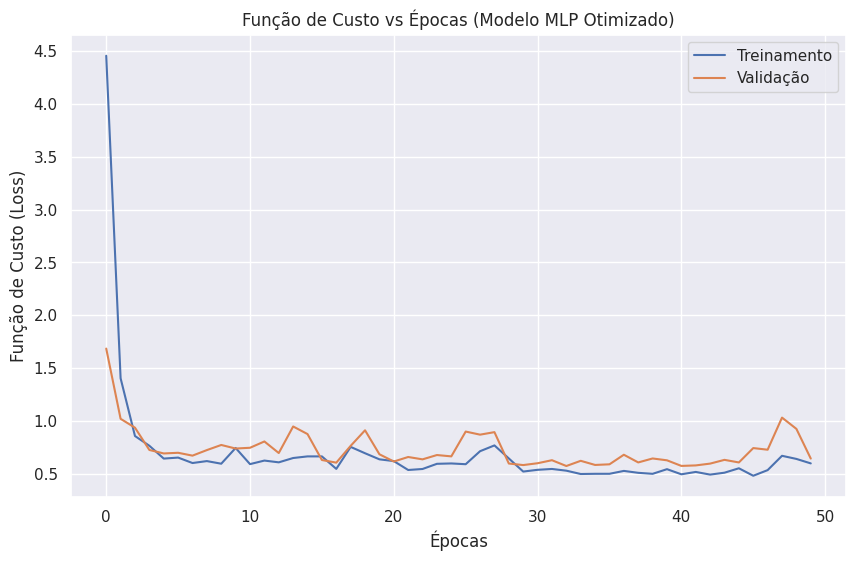

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de perda (função de custo)
plt.figure(figsize=(10, 6))
plt.plot(mlp_optimized_history.history['loss'], label='Treinamento')
plt.plot(mlp_optimized_history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo (Loss)')
plt.legend()
plt.title('Função de Custo vs Épocas (Modelo MLP Otimizado)')
plt.show()


In [ ]:
# Avaliar o modelo no conjunto de teste
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Acurácia do Modelo MLP Otimizado no Conjunto de Teste: {accuracy:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.6213 
Acurácia do Modelo MLP Otimizado no Conjunto de Teste: 0.7143


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


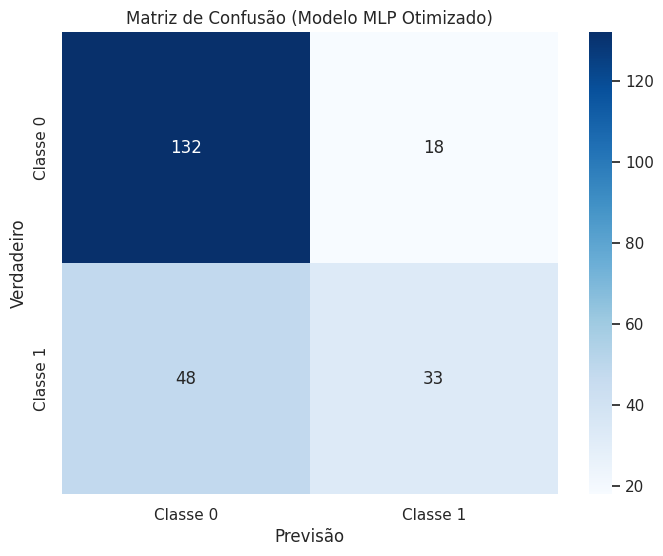

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       150
           1       0.65      0.41      0.50        81

    accuracy                           0.71       231
   macro avg       0.69      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Previsões
y_pred_mlp = (best_model.predict(X_test) > 0.5).astype(int)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Modelo MLP Otimizado)')
plt.show()

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_mlp))


In [ ]:
# Índices dos erros
error_indices = np.where(y_test != y_pred_mlp.flatten())[0]

# Exibir amostras com erros
print("Exemplos de Erros Cometidos:")
for idx in error_indices[:5]:  # Mostrando os primeiros 5 erros
    print(f"Entrada: {X_test[idx]}, Verdadeiro: {y_test[idx]}, Previsto: {y_pred_mlp[idx][0]}")


Exemplos de Erros Cometidos:
Entrada: [  3.    130.     78.     23.     79.     28.4     0.323  34.   ], Verdadeiro: 1, Previsto: 0
Entrada: [  4.    109.     64.     44.     99.     34.8     0.905  26.   ], Verdadeiro: 1, Previsto: 0
Entrada: [ 11.    143.     94.     33.    146.     36.6     0.254  51.   ], Verdadeiro: 1, Previsto: 0
Entrada: [  4.    144.     82.     32.      0.     38.5     0.554  37.   ], Verdadeiro: 1, Previsto: 0
Entrada: [  8.    105.    100.     36.      0.     43.3     0.239  45.   ], Verdadeiro: 1, Previsto: 0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.6926406926406926
Matriz de Confusão:
 [[120  31]
 [ 40  40]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.50      0.53        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Construção do pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação dos dados ausentes
    ('scaler', StandardScaler()),  # Normalização (padrão z-score)
    ('mlp', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42))  # Modelo MLP
])

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values,
                                                    data.iloc[:, -1].values,
                                                    test_size=0.3,
                                                    random_state=42)

# Treinar e avaliar o pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Resultados
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.70995670995671
Matriz de Confusão:
 [[112  39]
 [ 28  52]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.65      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



# Exercicio 3

3 a)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Divisão entre X (características) e y (alvo)
X = data.drop(columns=['Outcome'])  # Todas as colunas menos o alvo
y = data['Outcome']                # Apenas a coluna alvo

# Criando o pipeline para imputação e normalização
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação com a média
    ('scaler', StandardScaler())                 # Normalização
])

# Aplicando o pipeline nos dados
X_preprocessed = pipeline.fit_transform(X)


In [ ]:
# Proporção das classes no conjunto de dados
percentage_classes = data['Outcome'].value_counts(normalize=True) * 100
print(percentage_classes)

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


3 b)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Divisão dos dados
X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
accuracy_dummy = dummy.score(X_test, y_test)
print(f"Acurácia do modelo ingênuo: {accuracy_dummy:.2f}")


Acurácia do modelo ingênuo: 0.65


3 c)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import History

# Criando o pipeline para pré-processamento
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação
    ('scaler', StandardScaler())                 # Normalização
])

# Aplicando o pipeline aos dados
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Modelo perceptron-like
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_preprocessed.shape[1],))
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Treinamento
history = model.fit(X_train_preprocessed, y_train, epochs=100, validation_split=0.2, verbose=0)


3 d)

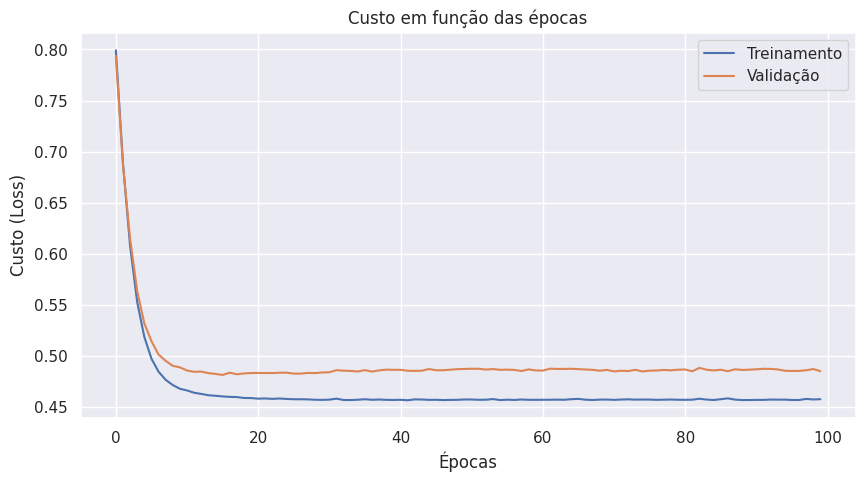

In [ ]:
import matplotlib.pyplot as plt

# Gráfico da função de custo
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Custo (Loss)')
plt.legend()
plt.title('Custo em função das épocas')
plt.show()


3 e)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy:.2f}")


Acurácia no conjunto de teste: 0.73


3 f)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


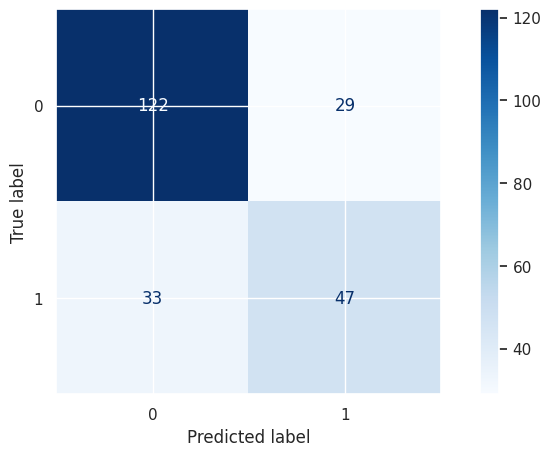

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Previsões
y_pred = (model.predict(X_test_preprocessed) > 0.5).astype(int)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


3 g)

In [ ]:
import numpy as np

# Identificar os índices de previsões incorretas
errors = np.where(y_pred.flatten() != y_test.values)[0]

# Exibir alguns exemplos de erros
print("Exemplos de erros cometidos pela rede:")
for i in errors[:5]:  # Mostrando os 5 primeiros erros
    print(f"Entrada: {X_test.iloc[i].values}, Previsão: {y_pred[i]}, Real: {y_test.iloc[i]}")


Exemplos de erros cometidos pela rede:
Entrada: [  6.    103.     72.     32.    190.     37.7     0.324  55.   ], Previsão: [1], Real: 0
Entrada: [  4.    154.     72.     29.    126.     31.3     0.338  37.   ], Previsão: [1], Real: 0
Entrada: [  5.         147.          78.          29.15341959 155.54822335
  33.7          0.218       65.        ], Previsão: [1], Real: 0
Entrada: [1.00000000e+01 1.11000000e+02 7.00000000e+01 2.70000000e+01
 1.55548223e+02 2.75000000e+01 1.41000000e-01 4.00000000e+01], Previsão: [0], Real: 1
Entrada: [7.00000000e+00 1.79000000e+02 9.50000000e+01 3.10000000e+01
 1.55548223e+02 3.42000000e+01 1.64000000e-01 6.00000000e+01], Previsão: [1], Real: 0


In [ ]:
# Modelo Multilayer Perceptron (MLP)
mlp_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.01),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

# Treinamento
mlp_history = mlp_model.fit(X_train_preprocessed, y_train, epochs=100, validation_split=0.2, verbose=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Normalização e divisão dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% treino, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)   # 15% val, 15% teste

# Função para criar o modelo
def create_model(neurons):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Configurações para Grid Search
neurons_list = [8, 16, 32]
epochs_list = [50, 100]
batch_sizes = [10, 20]

best_model = None
best_accuracy = 0
best_params = {}

# Loop manual para busca de hiperparâmetros
for neurons in neurons_list:
    for epochs in epochs_list:
        for batch_size in batch_sizes:
            print(f"Treinando modelo com {neurons} neurônios, {epochs} épocas, e batch_size={batch_size}")

            # Criando e treinando o modelo
            model = create_model(neurons)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

            # Avaliação no conjunto de validação
            y_pred = (model.predict(X_val) > 0.5).astype(int)
            accuracy = accuracy_score(y_val, y_pred)

            print(f"Acurácia: {accuracy}")

            # Salvando o melhor modelo
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {
                    'neurons': neurons,
                    'epochs': epochs,
                    'batch_size': batch_size
                }

# Resultados
print(f"Melhores parâmetros: {best_params}")
print(f"Melhor acurácia no conjunto de validação: {best_accuracy}")

# Matriz de confusão do melhor modelo no conjunto de validação
y_val_pred = (best_model.predict(X_val) > 0.5).astype(int)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print(f"Matriz de confusão no conjunto de validação:\n{conf_matrix_val}")

# Avaliação final no conjunto de teste
y_test_pred = (best_model.predict(X_test) > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print(f"Acurácia no conjunto de teste: {accuracy_test}")
print(f"Matriz de confusão no conjunto de teste:\n{conf_matrix_test}")


Treinando modelo com 8 neurônios, 50 épocas, e batch_size=10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia: 0.7391304347826086
Treinando modelo com 8 neurônios, 50 épocas, e batch_size=20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Acurácia: 0.7217391304347827
Treinando modelo com 8 neurônios, 100 épocas, e batch_size=10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia: 0.6782608695652174
Treinando modelo com 8 neurônios, 100 épocas, e batch_size=20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Acurácia: 0.7217391304347827
Treinando modelo com 16 neurônios, 50 épocas, e batch_size=10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia: 0.7217391304347827
Treinando modelo com 16 neurônios, 50 épocas, e batch_size=20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Acurácia: 0.7043478260869566
Treinando modelo com 16 neurônios, 100 épocas, e batch_size=10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Acurácia: 0.7478260869565218
Treinando modelo com 16 neurônios, 100 épocas, e batch_size=20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

# Exercício 4

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Pipeline para imputação, normalização e PCA
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação usando média
    ('scaler', StandardScaler()),  # Normalização
    ('pca', PCA(n_components=0.95))  # Captura 95% da variância
])

# Aplicação do pipeline aos dados
X_transformed = pipeline.fit_transform(X)
print(f"Dados transformados com PCA, nova forma: {X_transformed.shape}")

Dados transformados com PCA, nova forma: (768, 7)


In [ ]:
# Verificando a distribuição de classes no dataset
class_counts = y.value_counts()
total_samples = len(y)

# Calculando a porcentagem de cada classe
class_percentage = (class_counts / total_samples) * 100
print("Porcentagem de cada classe no dataset:")
print(class_percentage)

Porcentagem de cada classe no dataset:
Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_val)

accuracy_dummy = accuracy_score(y_val, y_pred_dummy)
print(f"Acurácia do modelo ingênuo (DummyClassifier): {accuracy_dummy:.4f}")


Acurácia do modelo ingênuo (DummyClassifier): 0.6783


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline com imputação, normalização e PCA
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Pipeline para imputação, normalização e PCA
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Para redução de dimensionalidade
])

# Aplicando o pipeline aos dados
X_transformed = pipeline.fit_transform(X)

# Dividindo os dados novamente
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Criando o modelo de rede neural
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Camada de entrada e saída
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)


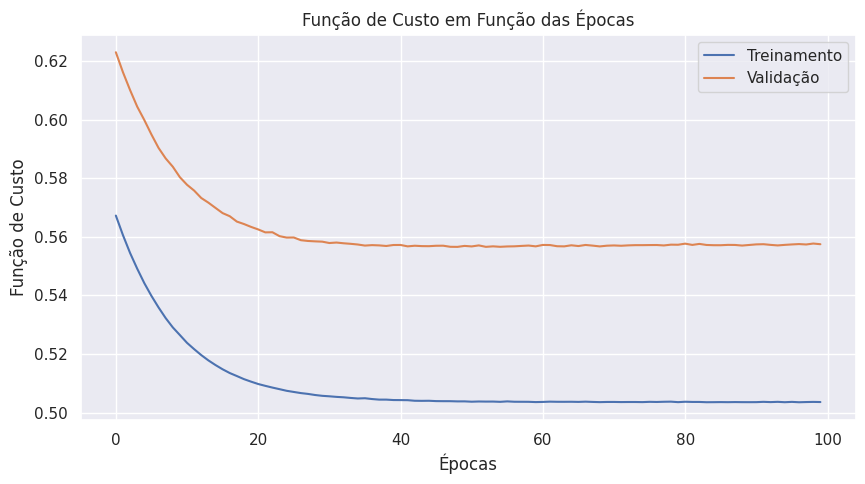

In [ ]:
import matplotlib.pyplot as plt

# Plotando a curva de custo
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Função de Custo em Função das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.legend()
plt.show()


In [ ]:
# Acurácia do modelo no conjunto de teste
accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy[1]:.2f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.5509 
Acurácia no conjunto de teste: 0.71


In [ ]:
from sklearn.metrics import confusion_matrix

# Prevendo os resultados
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusão:\n{conf_matrix}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Matriz de Confusão:
[[123  28]
 [ 40  40]]


In [ ]:
# Modelo MLP
mlp_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo MLP
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)


In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Função para criar o modelo MLP
def create_mlp_model(hidden_layer_neurons=32):
    model = Sequential([
        Dense(hidden_layer_neurons, input_dim=X_train.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrapping Keras model for GridSearch
mlp_model_grid = KerasClassifier(
    model=create_mlp_model,
    verbose=0
)

# Definindo os hiperparâmetros para busca
param_grid = {
    'model__hidden_layer_neurons': [16, 32, 64],  # Número de neurônios na camada oculta
    'batch_size': [10, 20],                       # Tamanho dos batches
    'epochs': [50, 100]                           # Número de épocas
}

# Grid Search
grid = GridSearchCV(estimator=mlp_model_grid, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Resultados da busca
print(f"Melhor combinação de parâmetros: {grid_result.best_params_}")
print(f"Melhor resultado de acurácia: {grid_result.best_score_}")


Melhor combinação de parâmetros: {'batch_size': 10, 'epochs': 100, 'model__hidden_layer_neurons': 32}
Melhor resultado de acurácia: 0.7560521415270017


4 j)

In [ ]:
# Melhor arquitetura
best_model = grid_result.best_estimator_
print(f"Melhor modelo encontrado: {best_model}")


Melhor modelo encontrado: KerasClassifier(
	model=<function create_mlp_model at 0x7d0018e7e680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
	model__hidden_layer_neurons=32
)


4 K)

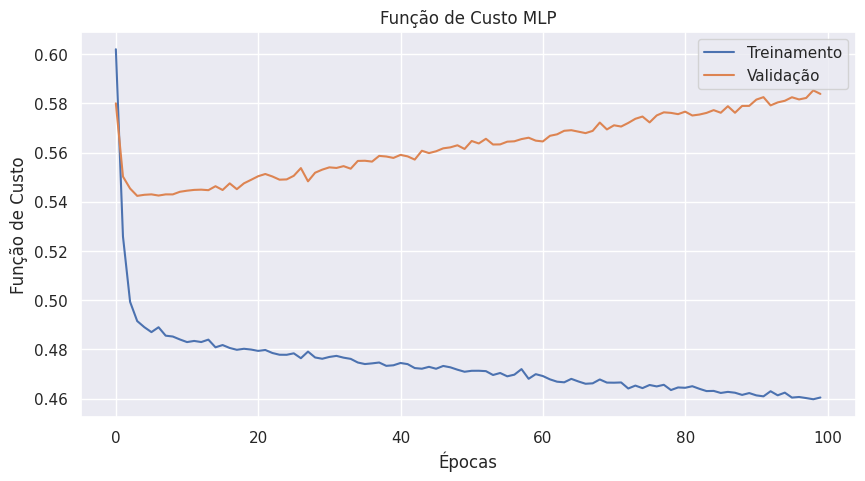

Acurácia MLP no conjunto de teste: 0.68
Matriz de Confusão MLP:
[[110  41]
 [ 34  46]]
Exemplos de erros cometidos pela MLP:
Índice: 0, Predição: 1, Verdadeiro: 0
Índice: 5, Predição: 1, Verdadeiro: 0
Índice: 8, Predição: 1, Verdadeiro: 0
Índice: 9, Predição: 1, Verdadeiro: 0
Índice: 10, Predição: 0, Verdadeiro: 1


In [ ]:
# Repetindo os passos para o MLP
history_mlp = best_model.fit(X_train, y_train, validation_data=(X_test, y_test))

history = history_mlp.history_

# Plotando gráfico de função de custo
plt.plot(history['loss'], label='Treinamento')
plt.plot(history['val_loss'], label='Validação')
plt.title('Função de Custo MLP')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.legend()
plt.show()

# Acurácia
accuracy_mlp = best_model.score(X_test, y_test)
print(f"Acurácia MLP no conjunto de teste: {accuracy_mlp:.2f}")

# Matriz de Confusão
y_pred_mlp = (best_model.predict(X_test) > 0.5).astype(int)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print(f"Matriz de Confusão MLP:\n{conf_matrix_mlp}")

# Exemplo de erros
errors_mlp = np.where(y_pred_mlp != y_test)[0]
print("Exemplos de erros cometidos pela MLP:")
for error in errors_mlp[:5]:
    print(f"Índice: {error}, Predição: {y_pred_mlp[error]}, Verdadeiro: {y_test.iloc[error]}")

# Exercicio 5

### Diferenças entre Imputação, Normalização e PCA

| **Etapa**              | **Descrição**                                                                                                                                                                         | **Impacto no Modelo**                                                                                                                                                                                                                  |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Imputação de Dados**  | Substitui valores ausentes no dataset por uma estimativa (ex: média, mediana ou moda).                                                                                              | Reduz a perda de dados causada por valores ausentes, melhora a qualidade dos dados e a performance do modelo.                                                                                                                         |
| **Normalização**        | Escala os dados para que fiquem dentro de um intervalo específico, geralmente [0,1] ou com média 0 e desvio padrão 1 (padronização).                                                | Facilita o treinamento do modelo, evitando que variáveis com valores grandes dominem a aprendizagem, acelerando a convergência do gradiente descendente.                                                                              |
| **PCA**                | Reduz a dimensionalidade do dataset, transformando variáveis originais em combinações lineares chamadas componentes principais, preservando a maior variância possível.               | Diminui a complexidade do modelo, reduzindo o risco de overfitting. Também acelera o treinamento e melhora a interpretação, mas pode descartar informações úteis dependendo do número de componentes principais escolhidos.              |


Como podemo ver tivemos overfiting quando fizemos todos os procedimentos + MLP isto pode indicar que a escolha dos melhores parãmetros pode não ter sido a melhor possível

Era de se esperar uma melhora conforme melhorassemos nossos dados recebidos, quando eu comecei a fazer a lista notei que tinham alguns dados faltantes e já quase fiz esse tratamento, porém não havia me atentado para os outros exercícios, mas pode-se ver que a fase de tratamento de dados é uma das mais importantes para criar um modelo com um bom desempenho.